In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

from sklearn.datasets import make_regression, make_circles

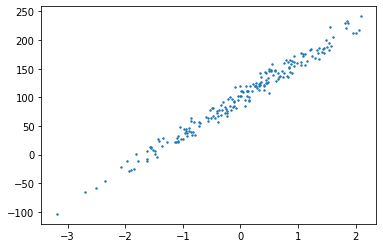

In [3]:
lin1 = make_regression(n_features=1, n_samples=200, noise=10,
                       bias=100, random_state=20)
plt.scatter(lin1[0], lin1[1], s=2)

La regresión lineal tiene crea una relación funcional entre la variable dependiente e independiente, donde las variables independientes tienen un caracter explicatorio. Estas variables están ponderadas por constantes $\beta$. La ecuación de dicha relación funcional es:

$$y_i = \beta_0 + \beta_1 x_{1,i} + \ldots + \beta_n x_{n,i} + \epsilon_i $$

Para nuestro análisis vamos a ocupar la forma matricial

$$
y = \left ( \begin{array} \\ y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right ), 
X = \left ( \begin{array} \\ 
                          1       & x_{21} & \ldots & x_{k1} \\ 
                          \vdots  & \vdots & \vdots & \vdots \\ 
                          1 & x_{2n} & \ldots & x_{kn} \end{array}  
     \right ) ,
\beta = \left ( \begin{array} \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n   \end{array} \right ) , 
\epsilon = \left ( \begin{array} \\ \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n   \end{array} \right )
$$

Entonces podemos replantear la expresión anterior en su forma matricial:

$$y = X \beta + \epsilon $$

donde $\beta$ es un vector de parámetros por conocer y $\epsilon$ es un vector de términos de ruido. Podemos computar el vector $\epsilon$ a partir de los datos por lo que tendríamos que hacer lo siguiente:



## Mínimos cuadrados y residuales

$$ y = X\beta + e $$

Donde $e$ puede ser computado de los datos

$$e = y - X\beta$$

Para determinar el estimador de mínimos cuadrados vamos a sumar todas los cuadrados de los residuales como función de $\beta$ 

$$ S(\beta) = \sum e_i^2 = (y-X\beta)'(y-X\beta) = y'y - y'X\beta - \beta'X'y + \beta'X'X\beta$$

Como lo que queremos es minimizar el error, lo que tenemos que hacer primero es derivar:

$$ \frac {\partial S(\beta)} {\partial \beta} = - y'X - X'y + 2'X'X\beta$$

Y después igualar a 0

$$ 0 = - y'X - X'y + 2'X'X\beta$$

De donde obtenemos 

$$ 2X'X\beta = 2X'\beta \implies X'X\beta = X'y $$

Resolviendo para $\beta$

$$ (X'X)^{-1} \cdot X'X\beta = (X'X)^{-1} \cdot X'y \implies  \beta = (X'X)^{-1}X' y $$



In [6]:
X = np.concatenate((np.ones_like(lin1[0]), lin1[0]), axis=1)

In [8]:
coefs = np.linalg.inv(X.T.dot(X)).dot(X.T)
coefs.shape

(2, 200)

In [10]:
b0, b1 = coefs.dot(lin1[1])

In [11]:
XX = np.linspace(-3,3)
regresion = b0 + XX.dot(b1)

In [12]:
regresion

array([-87.28871786, -79.63390687, -71.97909587, -64.32428487,
       -56.66947388, -49.01466288, -41.35985189, -33.70504089,
       -26.0502299 , -18.3954189 , -10.74060791,  -3.08579691,
         4.56901409,  12.22382508,  19.87863608,  27.53344707,
        35.18825807,  42.84306906,  50.49788006,  58.15269105,
        65.80750205,  73.46231305,  81.11712404,  88.77193504,
        96.42674603, 104.08155703, 111.73636802, 119.39117902,
       127.04599001, 134.70080101, 142.35561201, 150.010423  ,
       157.665234  , 165.32004499, 172.97485599, 180.62966698,
       188.28447798, 195.93928897, 203.59409997, 211.24891097,
       218.90372196, 226.55853296, 234.21334395, 241.86815495,
       249.52296594, 257.17777694, 264.83258793, 272.48739893,
       280.14220993, 287.79702092])

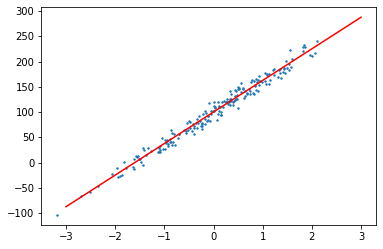

In [13]:
plt.scatter(lin1[0], lin1[1], s=2)
plt.plot(XX, regresion, '-r')

In [14]:
b0, b1

(100.25415152967413, 62.514289797091685)

## Otra derivación del modelo de regresión lineal o de ajuste por mínimos cuadrados

Sea $Y$ v.a. dependiente y $X$ la variable controlada independiente (libre de error). 

Consideremos la siguiente expresión para el error cuadrático promedio ($MSE$):

$$MSE = E[(Y-\hat Y)^2]$$

y recordemos que:

$$\hat Y = \beta_0 + \beta_1X$$

pero que en realidad $\hat Y$ debe de ser una combinación lineal de las $\beta_i$ no de la o las variables $X$, por lo que también podríamos ajustar:

$$\hat Y = \beta_0 + \beta_1X + \beta_2X^{1000}$$

y estaríamos ajustando también una regresión lineal.

Afirmación: $MSE =  MSE(\beta_0,\beta_1)$ es una función que describe una parábola que abre hacia arriba. Nótese que si tuviéramos más variables independientes (y por ende más $\beta_i$, tendríamos un paraboloide o un hiperparaboloide dependiendo de la dimensión en la que estuviéra encajada la función.

Ahora bien, minimizar $MSE$, implica encontrar las derivadas parciales respecto a cada variable, que recordemos en este caso son los parámetros $\beta_i$ e igualar cada parcial a cero:

$${\delta MSE \over \delta \beta_0}=E[-2(Y-\beta_0 - \beta_1X)] = -2(E[Y]-\beta_0-\beta_1E[X]) = 0~~~~~~~~~(1)$$

$${\delta MSE \over \delta \beta_1}=E[-2X(Y-\beta_0 - \beta_1X)] = -2(E[XY]-\beta_0E[X]-\beta_1E[X^2]) = 0~~~~~~~(2)$$

**Observación:** tanto la Esperanza como la Derivada son transformaciones lineales, por lo que derivar una esperanza es análogo a encontrar la esperanza de una derivada. Es por esto que podemos introducir la derivada dentro de los corchetes de la esperanza.

Y entonces tenemos un sistema de dos ecuaciones con dos incógnitas en donde vamos a proceder a resolverlo por el método de sustitución despejando $\beta_0$ de $(1)$ y sustituyéndola en $(2)$. Si además multiplicamos ambas ecuaciones por $-{1\over2}$ tendríamos:

$$\beta_0 = E[Y] - \beta_1E[X]~~~~~~~despejando~en~(1),~tenemos~(3)$$

$$E[XY]-(E[Y]-\beta_1E[X])E[X]-\beta_1E[X^2]=0~~~~~~~sustituyendo~(3)~en~(2),~tenemos~(4)$$

Haciendo un poco de álgebra en $(4)$ terminamos con una expresión interesante:

$$E[XY]-E[X]E[Y]+\beta_1E[X]^2-\beta_1E[X^2]=0$$

la cual básicamente nos dice:

$$Cov(X,Y) = \beta_1Var(X)$$

$$\beta_1 = {Cov(X,Y) \over Var(X)}~~~~~~~~~~(5)$$

y por lo tanto sustituyendo (5) en (3):

$$E[Y]=\beta_0+{Cov(X,Y) \over Var(X)}E[X]$$

Esto nos deja con una expresión muy interesante de la cual podemos desprender varias conclusiones:

1. El punto $(E[X],E[Y])$ siempre está sobre el polinomio ajustado.
2. El signo de la pendiente de la recta anterior está dado por la $Cov(X,Y)$, ya que $Var(X)$ siempre tiene signo positivo.
3. La pendiente de la recta ajustada representa una especie de índice de correlación lineal de Pearson en el que normalizamos o estandarizamos a la variable Y respecto a la varianza de X, ya que tenemos:

$${Cov(X,Y) \over Var(X)}={{E[X-E[X]]E[Y-E[Y]]}\over \sigma_X\sigma_X}$$

4. Más aún, supongamos que $Cov(X,Y)$ duplica a $Var(X)$ (i.e. $\beta_1 = 2$). Tendremos entonces que las variables $(X,Y)$ covarían el doble de lo que varía $X$, por lo que si deseamos predecir a $Y$ a partir de $X$, tiene sentido que dupliquemos su nivel de variación para poder abarcar la variación de $Y$.